# Handwritten Digit Recognition ML Project

## MITESH PARAB 

STEP1-  Import the required libraries, as shown below



In [1]:
import tensorflow as tf
from tensorflow.keras import  datasets , models, layers
import numpy as np

STEP2-The given dataset is divided into training images and testing images.


In [2]:
(x_train,y_train),(x_test,y_test)= datasets.mnist.load_data()

STEP3- import  Matplotlib

In [3]:
from matplotlib import  pyplot as plt

In [5]:
def show(x,y,i):
  plt.imshow(x[i])
  plt.xlabel(y[i])

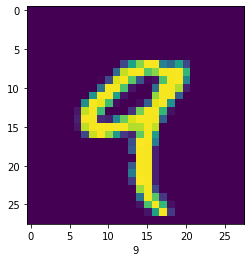

In [6]:
show(x_train,y_train,4)

STEP4- Normalize the x_train and y_train 

In [7]:
x_train.shape
x_train = x_train / 255
x_test = x_test / 255

STEP5- change the shape.

In [8]:
x_train = x_train.reshape(-1,28,28,1) 
x_test = x_test.reshape(-1,28,28,1)

STEP6- create our CNN model f

In [10]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28,28,1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

In [11]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

In [12]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])


 The summary of our modelg gets displayed 

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 576)               0

In [14]:
model.evaluate(x_test, y_test, verbose=0)

[2.3048787117004395, 0.10859999805688858]

STEP8-  Train the model

In [15]:
model.fit(x_train,y_train ,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 35s 18ms/step - loss: 0.1421 - accuracy: 0.9562
Epoch 2/5
1875/1875 [==============================] - 35s 18ms/step - loss: 0.0461 - accuracy: 0.9856
Epoch 3/5
1875/1875 [==============================] - 32s 17ms/step - loss: 0.0332 - accuracy: 0.9894
Epoch 4/5
1875/1875 [==============================] - 33s 17ms/step - loss: 0.0246 - accuracy: 0.9922
Epoch 5/5
1875/1875 [==============================] - 34s 18ms/step - loss: 0.0206 - accuracy: 0.9934


In [16]:
import numpy as np
y_predict = model.predict(x_test)
np.argmax(y_predict[5])

1

In [18]:
def pshow(x,y,i):
  plt.imshow(x[i])
  plt.xlabel(np.argmax(y[i]))

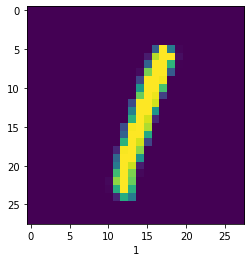

In [19]:
pshow(x_test,y_predict,5)